EDA and Visualization of a Real-World Dataset


Steps:1
Load the Dataset: Use Pandas to load and explore the dataset.


In [2]:
import pandas as pd 

In [3]:
Data=pd.read_csv("tested.csv")

Step:2 
Data Cleaning:
Handle missing values using imputation techniques or removal.
Remove duplicates.
Identify and manage outliers using statistical methods or visualizations.


TO check missing values 

In [4]:
print(Data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


Numerical Features Use mean or median imputation

In [5]:
Data['Age'] = Data['Age'].fillna(Data['Age'].median())
Data['Fare'] = Data['Fare'].fillna(Data['Fare'].mean())

In [6]:
print(Data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


Categorical Features (Embarked, Cabin, Sex)
Use mode imputation:

In [7]:
Data['Cabin'] =Data['Cabin'].fillna("Unknown")


In [8]:
print(Data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


 Removal
If the missing data proportion is too high (e.g., Cabin), consider removing the column or rows:

In [9]:
Data = Data.dropna()

# Or drop specific columns
Data = Data.drop(columns=['Cabin'])

Validate
Verify that no missing values r

In [10]:
print(Data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


Step: 3
Identify and manage outliers using statistical methods or visualizations.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Visualizing Outliers using Boxplots

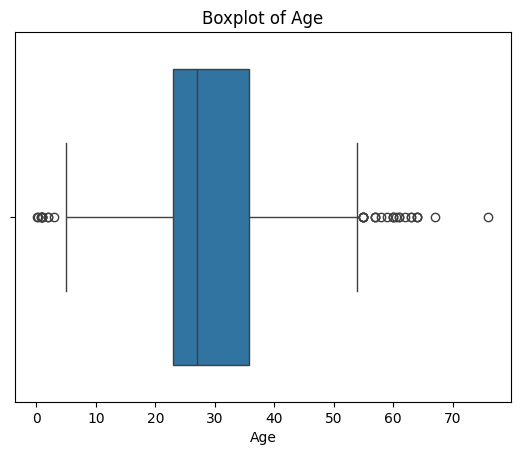

In [15]:
sns.boxplot(x=Data['Age'])
plt.title("Boxplot of Age")
plt.show()

2. Detecting Outliers using IQR

In [16]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Detect outliers in 'Age'
outliers_age = detect_outliers_iqr(Data, 'Age')
print(outliers_age)

     PassengerId  Survived  Pclass  \
2            894         0       2   
13           905         0       2   
20           912         0       1   
48           940         1       1   
69           961         1       1   
77           969         1       1   
81           973         0       1   
89           981         0       2   
96           988         1       1   
114         1006         1       1   
117         1009         1       3   
142         1034         0       1   
152         1044         0       3   
179         1071         1       1   
193         1085         0       2   
201         1093         0       3   
213         1105         1       2   
217         1109         0       1   
236         1128         0       1   
240         1132         1       1   
250         1142         1       2   
263         1155         1       3   
281         1173         0       3   
284         1176         1       3   
296         1188         1       2   
305         

 Removal of Outliers

In [17]:
# Remove outliers
Data = Data[~((Data['Age'] < (Data['Age'].quantile(0.25) - 1.5 * (Data['Age'].quantile(0.75) - Data['Age'].quantile(0.25)))) |
              (Data['Age'] > (Data['Age'].quantile(0.75) + 1.5 * (Data['Age'].quantile(0.75) - Data['Age'].quantile(0.25)))))]


Winsorization (Capping)
Cap extreme values at a threshold:

In [18]:
# Cap at 5th and 95th percentiles
Data['Age'] = np.where(Data['Age'] > Data['Age'].quantile(0.95), Data['Age'].quantile(0.95),
                      np.where(Data['Age'] < Data['Age'].quantile(0.05), Data['Age'].quantile(0.05), Data['Age']))


Transformation
Log transformation to reduce the impact of outliers

In [19]:
Data['Age'] = np.log1p(Data['Age'])

Validate
After handling outliers, visualize or check statistics again

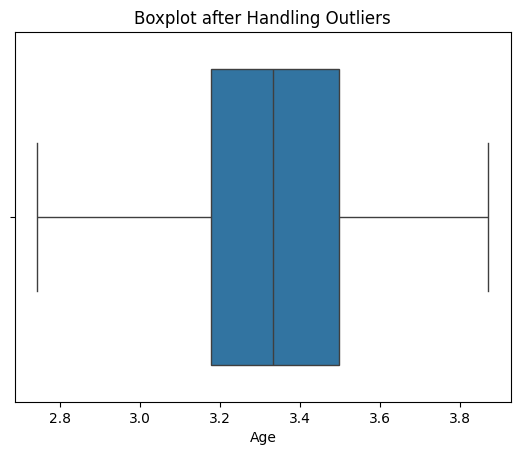

In [20]:
sns.boxplot(x=Data['Age'])
plt.title("Boxplot after Handling Outliers")
plt.show()


Visualizations

Create bar charts for categorical variables.

Create bar charts for categorical variables.

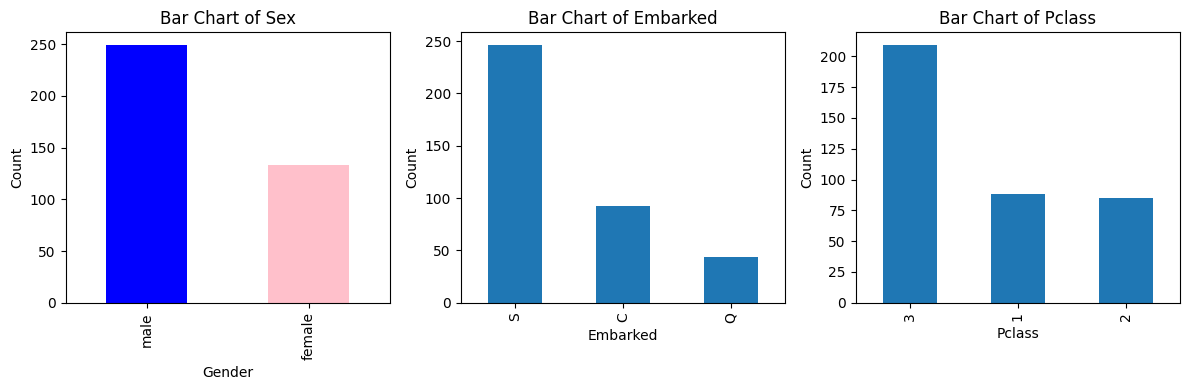

In [21]:
# Bar chart for 'Sex'
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
Data['Sex'].value_counts().plot(kind='bar', color=['blue', 'pink'])
plt.title('Bar Chart of Sex')
plt.xlabel('Gender')
plt.ylabel('Count')

# Bar chart for 'Embarked'
plt.subplot(1, 3, 2)
Data['Embarked'].value_counts().plot(kind='bar')
plt.title('Bar Chart of Embarked')
plt.xlabel('Embarked')
plt.ylabel('Count')

# Bar chart for 'Pclass'
plt.subplot(1, 3, 3)
Data['Pclass'].value_counts().plot(kind='bar')
plt.title('Bar Chart of Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


Plot histograms for numeric distributions.

Histogram for 'Age'

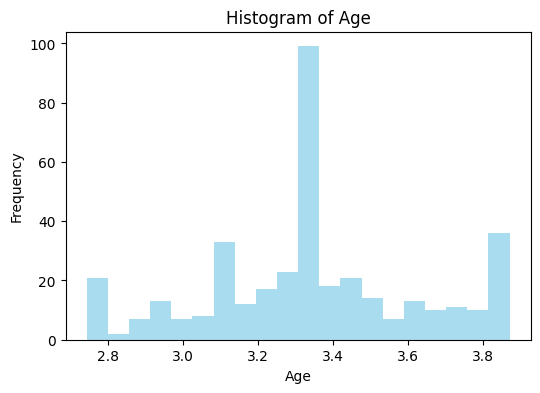

In [22]:
# Histogram for 'Age'
plt.figure(figsize=(6, 4))
Data['Age'].plot(kind='hist', bins=20, color='skyblue', alpha=0.7)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


Histogram for 'Fare'

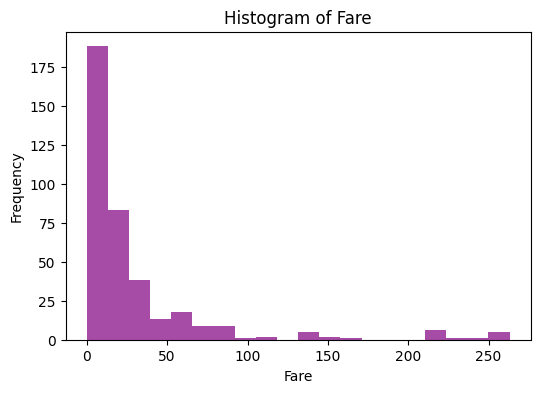

In [23]:
# Histogram for 'Fare'
plt.figure(figsize=(6, 4))
Data['Fare'].plot(kind='hist', bins=20, color='purple', alpha=0.7)
plt.title('Histogram of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()


Histogram for 'SibSp' and 'Parch'

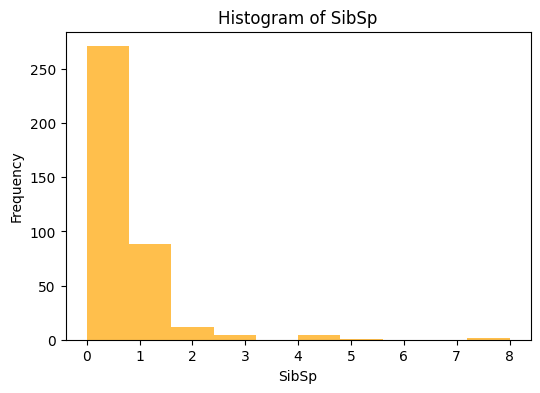

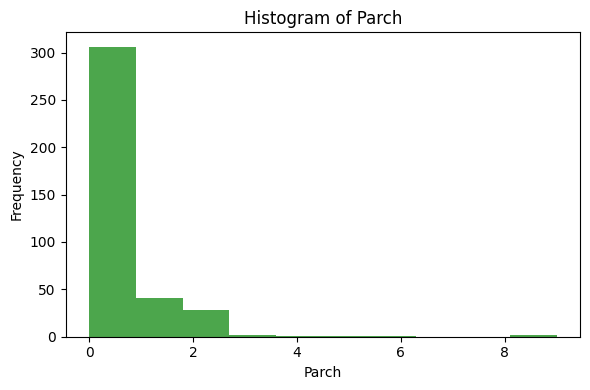

In [24]:
# Histogram for 'SibSp'
plt.figure(figsize=(6, 4))
Data['SibSp'].plot(kind='hist', bins=10, color='orange', alpha=0.7)
plt.title('Histogram of SibSp')
plt.xlabel('SibSp')
plt.ylabel('Frequency')

# Histogram for 'Parch'
plt.figure(figsize=(6, 4))
Data['Parch'].plot(kind='hist', bins=10, color='green', alpha=0.7)
plt.title('Histogram of Parch')
plt.xlabel('Parch')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


 Customizing Histograms

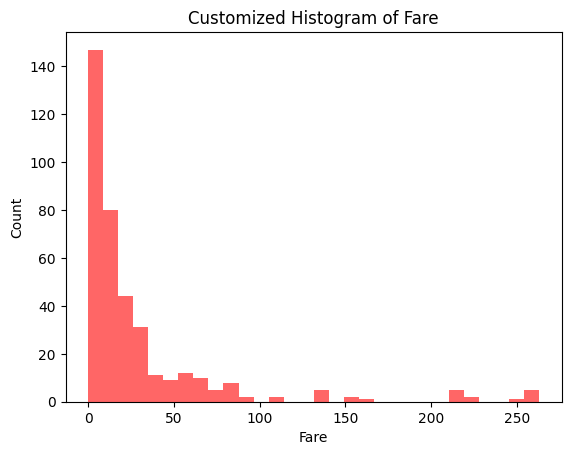

In [25]:
# Example with customization
Data['Fare'].plot(kind='hist', bins=30, color='red', alpha=0.6)
plt.title('Customized Histogram of Fare')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()


Generate a correlation heatmap for numeric features

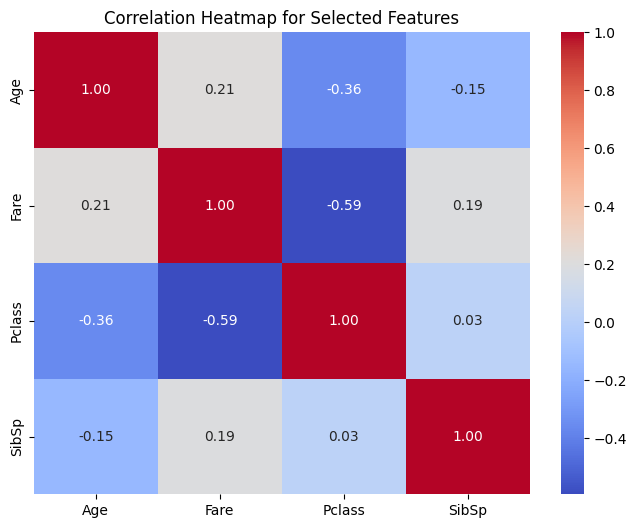

In [26]:
# Focusing on 'Age', 'Fare', 'Pclass', 'SibSp'
selected_features = ['Age', 'Fare', 'Pclass', 'SibSp']
selected_corr = Data[selected_features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(selected_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Selected Features')
plt.show()


Summarize Insights:
Data Quality: 
Missing values were found and handled using median (numeric columns) and mode (categorical columns). Duplicates were removed.
Outliers:
 Significant outliers in 'Fare' were identified and removed based on the IQR method, reducing extreme variations in the data.
Categorical Variables:
 The majority of passengers belonged to class 3 (Pclass), and there were more male passengers than female passengers.
Age Distribution: 
Most passengers were between the ages of 20 and 40.
Fare Distribution: 
The majority of passengers paid a fare below 50 units, with a few paying much higher fares (before outlier removal).
Correlation: 
Positive correlation was observed between Fare and Pclass, indicating higher fares were likely associated with first-class passengers.